## Biểu đồ thể hiện tỉ lệ số câu trong mỗi tập dữ liệu 

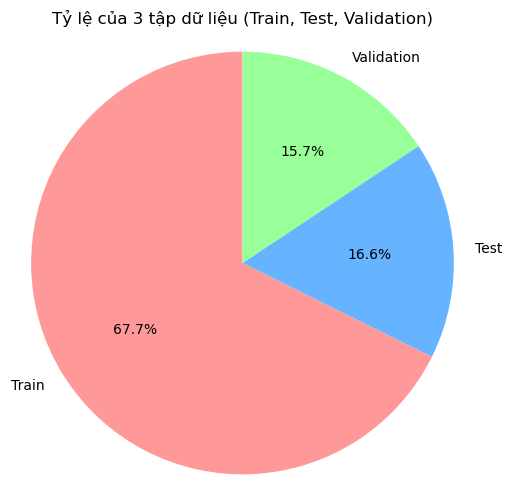

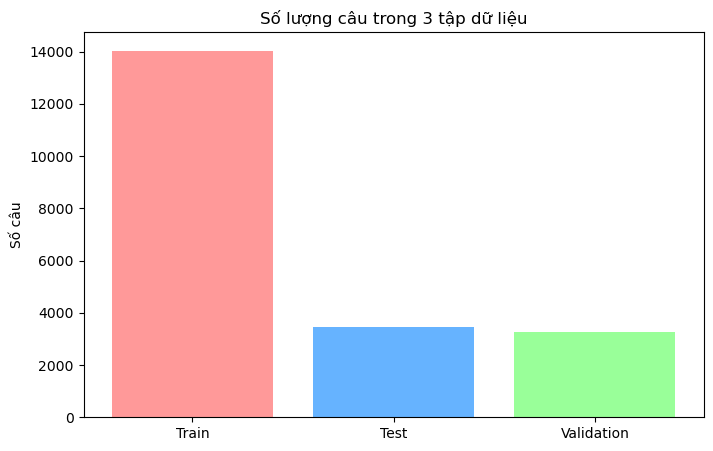

In [ ]:
import matplotlib.pyplot as plt

def readfile(filename, *, encoding="UTF8"):
    with open(filename, mode='rt', encoding=encoding) as f:
        sentences = []
        sentence = []
        for line in f:
            line = line.strip()  # Loại bỏ khoảng trắng và ký tự xuống dòng
            if len(line) == 0 or line.startswith('-DOCSTART'):
                if len(sentence) > 0:
                    sentences.append(sentence)
                    sentence = []
                continue
            splits = line.split(' ')
            sentence.append([splits[0], splits[-1]])

    if len(sentence) > 0:
        sentences.append(sentence)
    return sentences

# Đọc dữ liệu từ các tệp
train_sentences = readfile("train.txt")
test_sentences = readfile("test.txt")
valid_sentences = readfile("valid.txt")

# Tính số lượng câu trong mỗi tập
train_count = len(train_sentences)
test_count = len(test_sentences)
valid_count = len(valid_sentences)

# Tính tổng số câu
total_count = train_count + test_count + valid_count

# Tạo biểu đồ tròn thể hiện tỷ lệ
labels = ['Train', 'Test', 'Validation']
sizes = [train_count, test_count, valid_count]
colors = ['#ff9999','#66b3ff','#99ff99']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Tỷ lệ của 3 tập dữ liệu (Train, Test, Validation)')
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()

# Nếu muốn vẽ biểu đồ thanh, sử dụng đoạn mã sau:
plt.figure(figsize=(8,5))
plt.bar(labels, sizes, color=colors)
plt.title('Số lượng câu trong 3 tập dữ liệu')
plt.ylabel('Số câu')
plt.show()


## Đánh giá tỉ lệ các nhãn 

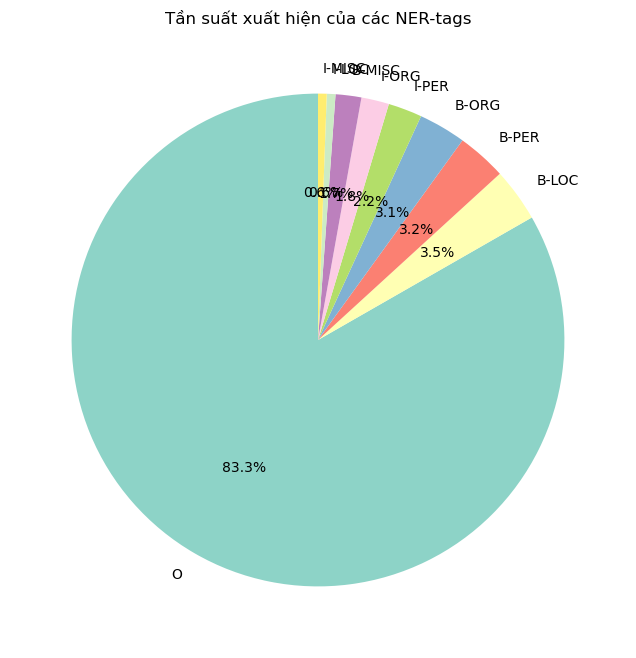

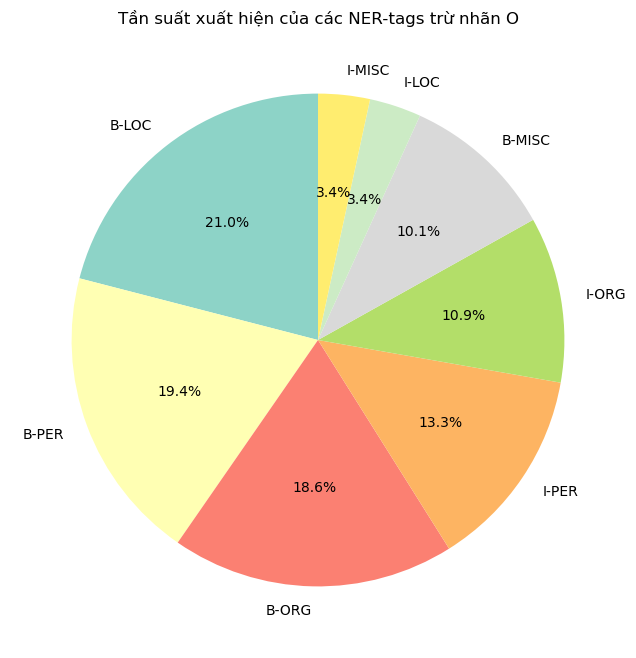

In [74]:
# Biến lưu dữ liệu
data = []
id = 0
tokens = []
tags = []

# Đọc dữ liệu từ train.txt
with open("train.txt", "r") as file:
    for line in file:
        line = line.strip()
        if line.startswith("-DOCSTART-"):
            # Nếu gặp -DOCSTART-, lưu đoạn trước đó và tăng id
            if tokens and tags:
                data.append([id, tokens, tags])
                tokens = []
                tags = []
            id += 1
        elif line:  # Nếu dòng không rỗng
            parts = line.split()
            if len(parts) == 4:  # Câu có đủ 4 phần tử
                tokens.append(parts[0])
                tags.append(parts[3])

# Thêm đoạn cuối cùng vào dữ liệu
if tokens and tags:
    data.append([id, tokens, tags])

data = pd.DataFrame(data, columns=["id", "tokens", "tags"])


import matplotlib.pyplot as plt

# Kết hợp tất cả các tags trong DataFrame
all_tags = [tag for tag_list in data['tags'] for tag in tag_list]

# Tính tần suất xuất hiện của từng tag
tag_counts = pd.Series(all_tags).value_counts()

# Vẽ biểu đồ pie
plt.figure(figsize=(8, 8))
tag_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Tần suất xuất hiện của các NER-tags')
plt.ylabel('')  # Tắt nhãn trục y
plt.show()



import matplotlib.pyplot as plt

# Kết hợp tất cả các tags trong DataFrame
all_tags = [tag for tag_list in data['tags'] for tag in tag_list]

# Tính tần suất xuất hiện của từng tag
tag_counts = pd.Series(all_tags).value_counts().drop("O")

# Vẽ biểu đồ pie
plt.figure(figsize=(8, 8))
tag_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Tần suất xuất hiện của các NER-tags trừ nhãn O')
plt.ylabel('')  # Tắt nhãn trục y
plt.show()

## Số lượng đoạn văn trong mỗi tập 

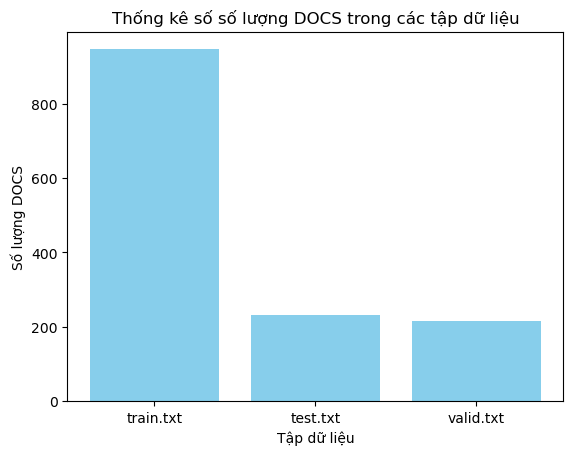

In [79]:
import matplotlib.pyplot as plt

# Hàm đếm số dòng DOCSTART
def count_docstart(filename):
    docstart_count = 0
    with open(filename, "r") as file:
        for line in file:
            if line.startswith("-DOCSTART"):
                docstart_count += 1
    return docstart_count

# Đếm số dòng DOCSTART trong ba file
docstart_count_train = count_docstart("train.txt")
docstart_count_test = count_docstart("test.txt")
docstart_count_valid = count_docstart("valid.txt")

# Vẽ biểu đồ thống kê
labels = ['train.txt', 'test.txt', 'valid.txt']
counts = [docstart_count_train, docstart_count_test, docstart_count_valid]

plt.bar(labels, counts, color='skyblue')
plt.xlabel('Tập dữ liệu')
plt.ylabel('Số lượng DOCS')
plt.title('Thống kê số số lượng DOCS trong các tập dữ liệu')
plt.show()


## độ dài trung bình câu mỗi tậptập

Train - Trung bình: 14.501887329962253, Độ lệch chuẩn: 11.602342778538237
Test - Trung bình: 13.447726614538082, Độ lệch chuẩn: 11.550839720515423
Valid - Trung bình: 15.803692307692307, Độ lệch chuẩn: 12.601449925029174


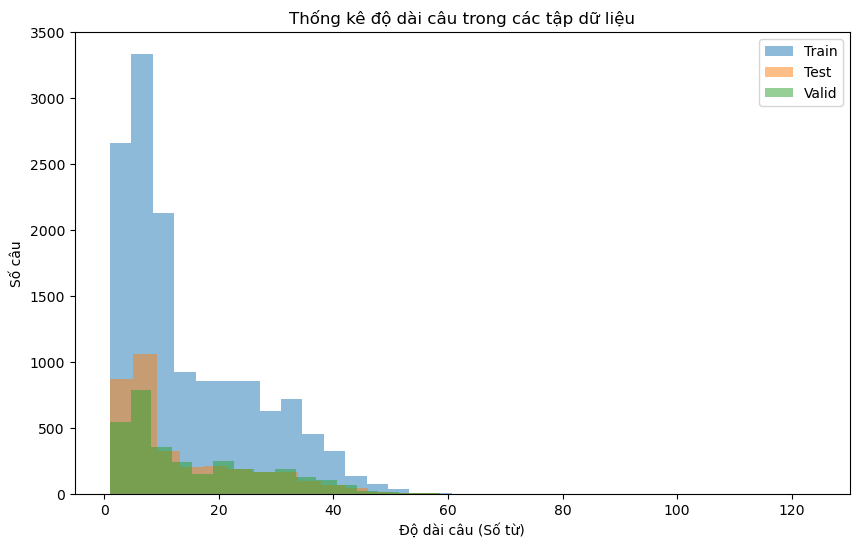

In [80]:
import numpy as np
import matplotlib.pyplot as plt

def readfile(filename, *, encoding="UTF8"):
    with open(filename, mode='rt', encoding=encoding) as f:
        sentences = []
        sentence = []
        for line in f:
            line = line.strip()  # Loại bỏ khoảng trắng và ký tự xuống dòng
            if len(line) == 0 or line.startswith('-DOCSTART'):
                if len(sentence) > 0:
                    sentences.append(sentence)
                    sentence = []
                continue
            splits = line.split(' ')
            sentence.append([splits[0], splits[-1]])

        if len(sentence) > 0:
            sentences.append(sentence)
    return sentences

def sentence_lengths(sentences):
    # Tính độ dài của mỗi câu (theo số từ)
    lengths = [len(sentence) for sentence in sentences]
    return lengths

# Đọc dữ liệu từ các file
train_sentences = readfile("train.txt")
test_sentences = readfile("test.txt")
valid_sentences = readfile("valid.txt")

# Tính độ dài câu cho từng tập dữ liệu
train_lengths = sentence_lengths(train_sentences)
test_lengths = sentence_lengths(test_sentences)
valid_lengths = sentence_lengths(valid_sentences)

# Tính thống kê cơ bản
print(f"Train - Trung bình: {np.mean(train_lengths)}, Độ lệch chuẩn: {np.std(train_lengths)}")
print(f"Test - Trung bình: {np.mean(test_lengths)}, Độ lệch chuẩn: {np.std(test_lengths)}")
print(f"Valid - Trung bình: {np.mean(valid_lengths)}, Độ lệch chuẩn: {np.std(valid_lengths)}")

# Vẽ biểu đồ thống kê độ dài câu
plt.figure(figsize=(10, 6))
plt.hist(train_lengths, bins=30, alpha=0.5, label='Train')
plt.hist(test_lengths, bins=30, alpha=0.5, label='Test')
plt.hist(valid_lengths, bins=30, alpha=0.5, label='Valid')

plt.title('Thống kê độ dài câu trong các tập dữ liệu')
plt.xlabel('Độ dài câu (Số từ)')
plt.ylabel('Số câu')
plt.legend(loc='upper right')
plt.show()


## Đồ thị phân phối chuẩn cho độ dài câu của các tập dữ liệu

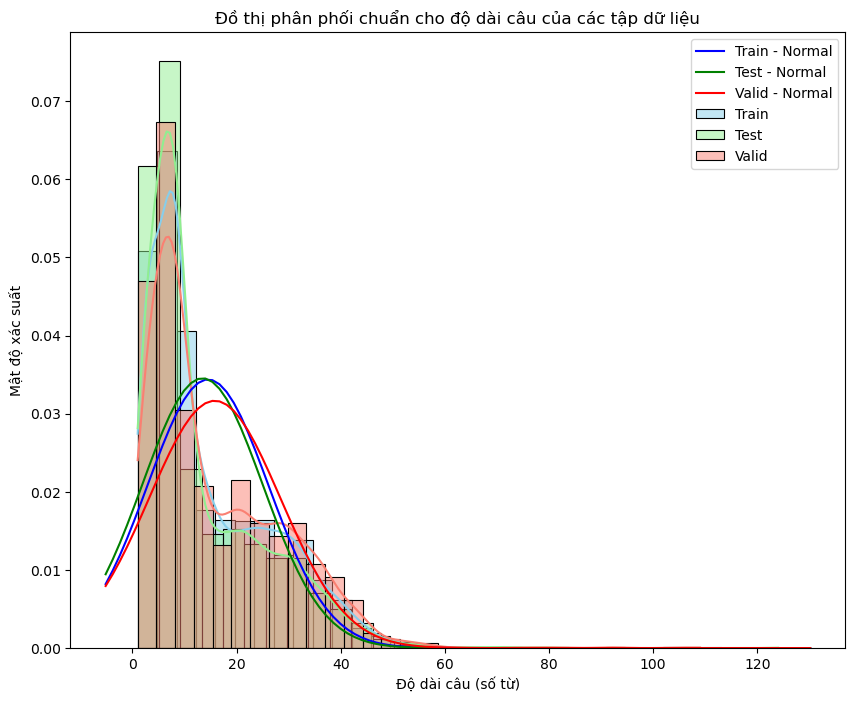

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Đọc dữ liệu từ file
def readfile(filename, *, encoding="UTF8"):
    with open(filename, mode='rt', encoding=encoding) as f:
        sentences = []
        sentence = []
        for line in f:
            line = line.strip()  # Loại bỏ khoảng trắng và ký tự xuống dòng
            if len(line) == 0 or line.startswith('-DOCSTART'):
                if len(sentence) > 0:
                    sentences.append(sentence)
                    sentence = []
                continue
            splits = line.split(' ')
            sentence.append([splits[0], splits[-1]])

    if len(sentence) > 0:
        sentences.append(sentence)
    return sentences

# Đọc các tập dữ liệu
train_sentences = readfile("train.txt")
test_sentences = readfile("test.txt")
valid_sentences = readfile("valid.txt")

# Tính độ dài câu (số từ trong mỗi câu)
sentence_lengths_train = [len(sentence) for sentence in train_sentences]
sentence_lengths_test = [len(sentence) for sentence in test_sentences]
sentence_lengths_valid = [len(sentence) for sentence in valid_sentences]

# Vẽ đồ thị phân phối chuẩn
plt.figure(figsize=(10, 8))

# Vẽ histogram và kde cho từng tập dữ liệu
sns.histplot(sentence_lengths_train, kde=True, stat="density", bins=30, color="skyblue", linewidth=0.8, label="Train")
sns.histplot(sentence_lengths_test, kde=True, stat="density", bins=30, color="lightgreen", linewidth=0.8, label="Test")
sns.histplot(sentence_lengths_valid, kde=True, stat="density", bins=30, color="salmon", linewidth=0.8, label="Valid")

# Tính toán phân phối chuẩn lý thuyết cho mỗi tập
mu_train, sigma_train = np.mean(sentence_lengths_train), np.std(sentence_lengths_train)
mu_test, sigma_test = np.mean(sentence_lengths_test), np.std(sentence_lengths_test)
mu_valid, sigma_valid = np.mean(sentence_lengths_valid), np.std(sentence_lengths_valid)

xmin, xmax = plt.xlim()  # Lấy giới hạn của trục x
x = np.linspace(xmin, xmax, 100)

# Vẽ đường phân phối chuẩn lý thuyết cho từng tập
plt.plot(x, norm.pdf(x, mu_train, sigma_train), 'b', label="Train - Normal")
plt.plot(x, norm.pdf(x, mu_test, sigma_test), 'g', label="Test - Normal")
plt.plot(x, norm.pdf(x, mu_valid, sigma_valid), 'r', label="Valid - Normal")

# Thêm tiêu đề và nhãn
plt.title('Đồ thị phân phối chuẩn cho độ dài câu của các tập dữ liệu')
plt.xlabel('Độ dài câu (số từ)')
plt.ylabel('Mật độ xác suất')

# Hiển thị chú thích
plt.legend()

# Hiển thị đồ thị
plt.show()


## Các token phổ biến trong tập train.txt

C:\Users\quyen\AppData\Local\Temp\ipykernel_17440\1288725271.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(tokens), y=list(counts), palette='viridis')


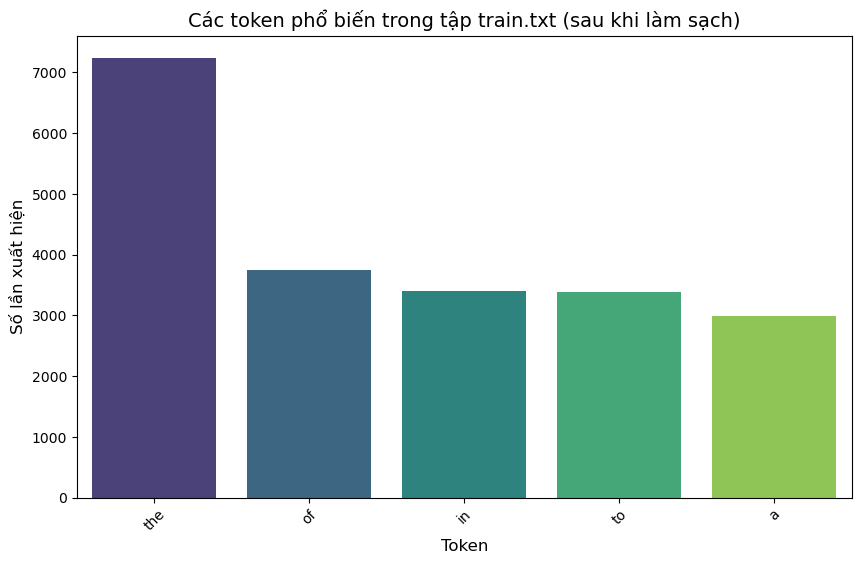

In [89]:
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ file
def readfile(filename, *, encoding="UTF8"):
    with open(filename, mode='rt', encoding=encoding) as f:
        sentences = []
        sentence = []
        for line in f:
            line = line.strip()  # Loại bỏ khoảng trắng và ký tự xuống dòng
            if len(line) == 0 or line.startswith('-DOCSTART'):
                if len(sentence) > 0:
                    sentences.append(sentence)
                    sentence = []
                continue
            splits = line.split(' ')
            sentence.append([splits[0], splits[-1]])

    if len(sentence) > 0:
        sentences.append(sentence)
    return sentences

# Đọc dữ liệu từ tập train.txt
train_sentences = readfile("train.txt")

# Tách token từ các câu trong train_sentences và loại bỏ dấu chấm câu và ký tự đặc biệt
def clean_token(token):
    # Loại bỏ ký tự đặc biệt, dấu chấm câu và chỉ giữ lại chữ cái và số
    return re.sub(r'[^a-zA-Z0-9]', '', token)

# Tạo danh sách token đã được làm sạch
tokens = [clean_token(word[0]) for sentence in train_sentences for word in sentence]

# Loại bỏ các token rỗng (sau khi làm sạch)
tokens = [token for token in tokens if token]

# Đếm tần suất xuất hiện của các token
token_counts = Counter(tokens)

# Lấy 20 token phổ biến nhất
most_common_tokens = token_counts.most_common(5)

# Tách token và tần suất thành hai danh sách riêng biệt
tokens, counts = zip(*most_common_tokens)

# Vẽ biểu đồ cột cho các token phổ biến
plt.figure(figsize=(10, 6))
sns.barplot(x=list(tokens), y=list(counts), palette='viridis')

# Thêm tiêu đề và nhãn
plt.title('Các token phổ biến trong tập train.txt (sau khi làm sạch)', fontsize=14)
plt.xlabel('Token', fontsize=12)
plt.ylabel('Số lần xuất hiện', fontsize=12)

# Xoay nhãn trục x để dễ đọc
plt.xticks(rotation=45)

# Hiển thị đồ thị
plt.show()
